In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


Epoch 1/200
10/10 [==============================] - 1s 49ms/step - loss: 0.2149 - acc: 0.4909 - val_loss: 0.1494 - val_acc: 0.8824
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1752 - acc: 0.6752 - val_loss: 0.1007 - val_acc: 0.8824
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1285 - acc: 0.7547 - val_loss: 0.0680 - val_acc: 0.8824
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1009 - acc: 0.7674 - val_loss: 0.0547 - val_acc: 0.8824
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0953 - acc: 0.7515 - val_loss: 0.0483 - val_acc: 0.9412
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0867 - acc: 0.7687 - val_loss: 0.0413 - val_acc: 0.9412
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0764 - acc: 0.8447 - val_loss: 0.0385 - val_acc: 0.9412
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0705 - 

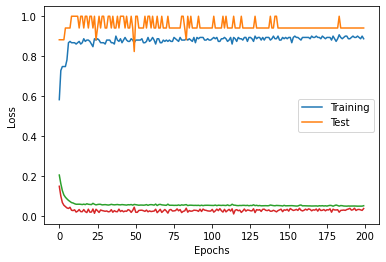

In [27]:
data = pd.read_csv("../input/match-data/Match_Results.csv")
X = data.loc[:, "2.35":"3.1"]
y = data.loc[:, "0":"0"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model=Sequential()
model.add(Dense(64,activation="relu",
                input_shape=X_train[0].shape))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(3,activation="softmax"))

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["acc"])

history=model.fit(X_train,y_train, 
         epochs = 200,
         validation_split=0.1,
         shuffle=True,
         steps_per_epoch=10)

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Test"])

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Test"])

y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

confusion_matrix = multilabel_confusion_matrix(y_test, y_pred)

precision_1 = confusion_matrix[0][0][0] / (confusion_matrix[0][0][0]+confusion_matrix[0][1][0])
precision_2 = confusion_matrix[1][0][0] / (confusion_matrix[1][0][0]+confusion_matrix[1][1][0])
precision_0 = confusion_matrix[2][0][0] / (confusion_matrix[2][0][0]+confusion_matrix[2][1][0])

recall_1 = confusion_matrix[0][0][0] / (confusion_matrix[0][0][0]+confusion_matrix[0][0][1])
recall_2 = confusion_matrix[1][0][0] / (confusion_matrix[1][0][0]+confusion_matrix[1][0][1])
recall_0 = confusion_matrix[2][0][0] / (confusion_matrix[2][0][0]+confusion_matrix[2][0][1])

f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
f1_2 = 2 * (precision_2 * recall_2) / (precision_2 + recall_2)
f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
                                       
acc_score = accuracy_score(y_test, y_pred)